# Bank Customer Churn Prediction with Logistic Regression

## 1. Introduction

Customer churn is a crucial business metric that shows what proportion of customers discontinued using your product or service over a given time frame. Another name for customer turnover is **Customer attrition**. Customer churn (the percentage of lost clients) or revenue churn are the two terms that describe how much *business you lost*. 

This project will investigate **customer churn**. This is determined as

((Lost Customers)/(Total Customers at the Beginning of Time Period))x100

According to US Data, the highest churn rates (25%) are found in the cable and financial/credit industries. The cable industry makes sense given the rise of streaming, but the credit and financial sectors need to address this problem. 

#### We are going to use logistic regression in this analysis with the dataset given to us

Predictive Modeling with Logistic Regression is a statistical techinique used for binary classification. In this situation our data is categorical (1 for exited and 0 for not exited). It will be used to predict binary outcomes and to understand the factores that influence those outcomes. Predictive Modeling with Logistic Regression is used in our predictive modeling analysis because it is flexible, efficient and fast to train, interpretable and it can handle outliers pretty well. All these makes it a good choice for our analysis.

Going forward, here are few questions we have to ask ourselves with a dataset like this; 

* What characteristics or trends in consumer behavior increase the likelihood that a customer may leave another company? (This might be because of their excellent credit score, tenure, etc.)


* What is the difference in the churn rate between the various client segments?


* How does the turnover rate of the bank stack up against its own standards?

## 2. Data preparation and review

The following dataset was obtained through Kaggle. Let's identify it and list its limitations. 

#### Information on the data source:


* The data is publicly available on Kaggle and is stored as a CSV file with 10001 rows (10000 customers + 1 (the column header)) and 14 features (columns)


* Each row represents a customer and it's features with Exited being our main point of interest with 0 meaning he/she stayed and 1 meaning they left.


* The dataset has the following features respectively: CreditScore, Geography, Gender, Age, Tenure, Balance, Number of products, Has Credit Card, Is active member, Estimated Salary and Exited (Our target variable)


#### Limitations on our data:

* A good data source is Reliable, Original, Comprehensive, Current and Cited (ROCCC). Indeed this dataset is reliable with it's 10000 customers and is quite original and comprehensive. However, this is a dataset from 2018 and the last update was 4 years ago so it might not be extremely relevant. Also the dataset is not cited


* This dataset did have more context to it than letting us interpret it for modeling and analysis. Which means we do not have the companies KPIs, variety in the services they offer, retention strategies, the quantity of pressure customer service applies, legal issues that could influence churn and even the name of the bank in question


#### However, I believe this model can be applied with current data in any bank system as this data will run with the possible data it has at grasp.

*After reviewing the data through Excel, our data contains no duplicate values client wise and no missing values (verified with conditional formating). I will recheck here just for analysis purposes*

#### Here are the 14 different features(columns) of our dataset;

'RowNumber': A sequential index assigned to each row

'CustomerId': A unique serial key for each customer

'Surname': The customer's surname

'CreditScore': The customer's credit score

'Geography': The country of the customer

'Gender': The gender of the customer

'Age': The age of the customer

'Tenure': The number of years the customer has been with the bank

'Balance': The current balance in the customer's account

'NumOfProducts': The number of banking products the customers has with the bank

'HasCrCard': Whether or not the customer has a credit card with the bank

'IsActiveMember': Whether or not the customer is an active member of the bank

'EstimatedSalary': The estimated salary of the customer

'Exited': Whether or not the customer has churned (1 if they did, 0 if they did not)

### Let's explore the structure of our data

In [3]:
#Installation of our required libraries
#For data cleaning

import numpy as np
import pandas as pd

#For data visualization in our notebook

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Read our data frame that we imported from Excel
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
#Let's check if our data still has the same shape
df.shape

(10000, 14)

In [8]:
#Display of the first 5 values
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
#Like mentioned before, let's check for any duplicate and missing values
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

This was to demonstrate that the Excel analysis was accurate as we do not have any duplicate values (10000 customer ids for 10000 customers information) and no missing values.

In [15]:
#Let's get the data types of the different features
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
#Let's get the summary statistics for the numeric variables 
#We will omit Row Number and Customer Id as they are identification numbers and
#will omit Exited, HasCrCard and IsActiveMember as they are just categories

#These are more relevant and can give us an idea on our data in terms of mean and std
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# The summary statistics for the selected columns are;
df[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Let's recheck our first 10 data rows to form some main questions around the data;

In [17]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### The following questions are going to be pivotal in our upcoming Exploratory Data Analysis; 

* What columns will be relevant for our analysis? We have 14 features but not every one is detrimental into knowing if a customer is going to churn or not.


* What is the ratio between the churned and not churned?


* How does the Credit Score, Geography, Gender, Age and other factors influence the rate of churn? What are the trends that we can observe with our data?


* How does each data coorelates with each other?

# 3. Exploratory Data Analysis

Firstly, to be effective as possible, we only want to work with relevant data and weed out what is not going to be useful to us. The following columns will be definetly dropped;
'Row Number' as it is just a number, 'CustomerId' as it is just a serial number that will not really help us in knowing if a customer is going to churn or not and lastly 'Surname' because I do not see how your name will influence the decision you going to take in this context. It just leads to unnecessary profiling if we include it in our data 

In [18]:
#Dropping the columns
df = df.drop (['RowNumber','CustomerId','Surname'],axis=1)

In [19]:
#Let's recheck our data
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's now get to understanding our data

In [ ]:
#What is the retention rate of our bank? 
# The best way to see the ratio between churned and not churned is a pie chart

In [20]:
#Let's count the number of unique values in the Exited column
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Proportion of Customers who Exited')

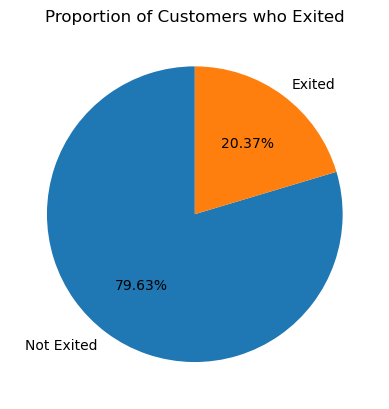

In [30]:
#We can already visualize what the percentages are going to be. 
#Let's create our diagram

ratios = df['Exited'].value_counts()

#Labels to label our data, autopct formats our percentage labels, 
#startangle sets us where we want the first slice to start

plt.pie(ratios,labels=['Not Exited','Exited'], autopct = '%0.2f%%', 
        startangle=90)

plt.title('Proportion of Customers who Exited')

Let's observe the distribution of ages in the dataset with a histogram and compare it to the 'Exited' column. (Will start calling Churned as Class 1 and Not churned as Class 0)

<AxesSubplot:xlabel='Age', ylabel='Count'>

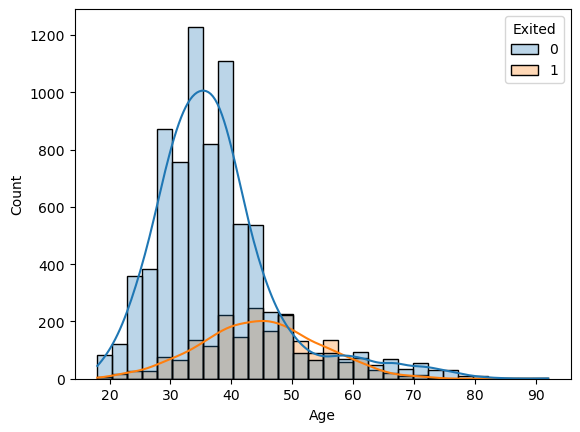

In [46]:
#Histplot allows us to see the distribution of our data
# Our KDE curves shows the distribution and alpha is our transparency parameter
sns.histplot(x = 'Age', data = df, hue='Exited',bins=30,kde=True,alpha=0.3)

Our data tells us the following which is pretty interesting, So:

* There is a big concentration of our distribution that are aged between 30 and 40 years old. Since there are more people who did not churn, we could say that the majority of our dataset lies between that range.


* What is interesting is people who churned are actually more between ages 40 and 50. So what happens? Do they get tired or maybe most are not rewarded for their tenure? We can see late 20s to 40s have all the clients and as soon as our Class 0 curve slopes downwards, our Class 1 is about to peak at Age 40. So Age 40/late 30s are ages that I can say that we absolutely have to be in check with our customers to increase retention rate. 

Now let's analyze our data in terms of country and 'Exited'.

<AxesSubplot:xlabel='Geography', ylabel='count'>

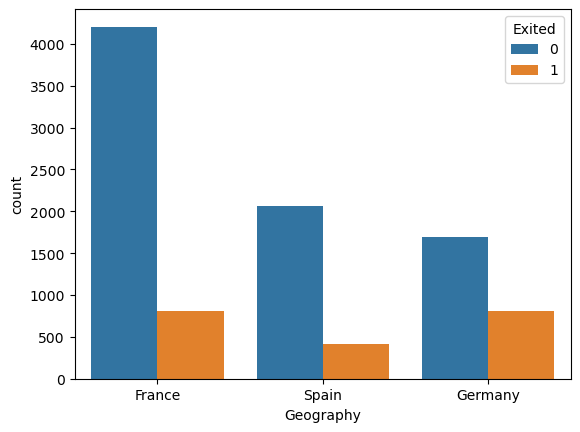

In [49]:
sns.boxplot(x='Geography',hue='Exited',data=df)

It looks that most of our dataset is from France. With France having the highest ratio of not churned to churned with a 5:1 ratio. Second comes Spain with a 4:1 and Germany that barely has 2:1. 

To make our data visualization process more fluid, we will divide our data into continuous data attributes and categorical data attributes. This will allow us to better shape our data for our studies.



In [93]:
#Continuous data attributes are values that can take any value within a range
# = 'CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary' 
                  

#Categorical data attributes are non numerical values that represent categories
# Did not include 'Exited' which is a categorical attribute because
#  I want to use it for analysis
# = 'Geography', 'Gender','HasCrCard','IsActiveMember'

Let's view the countplots for our other categorical features;

<AxesSubplot:xlabel='Geography', ylabel='count'>

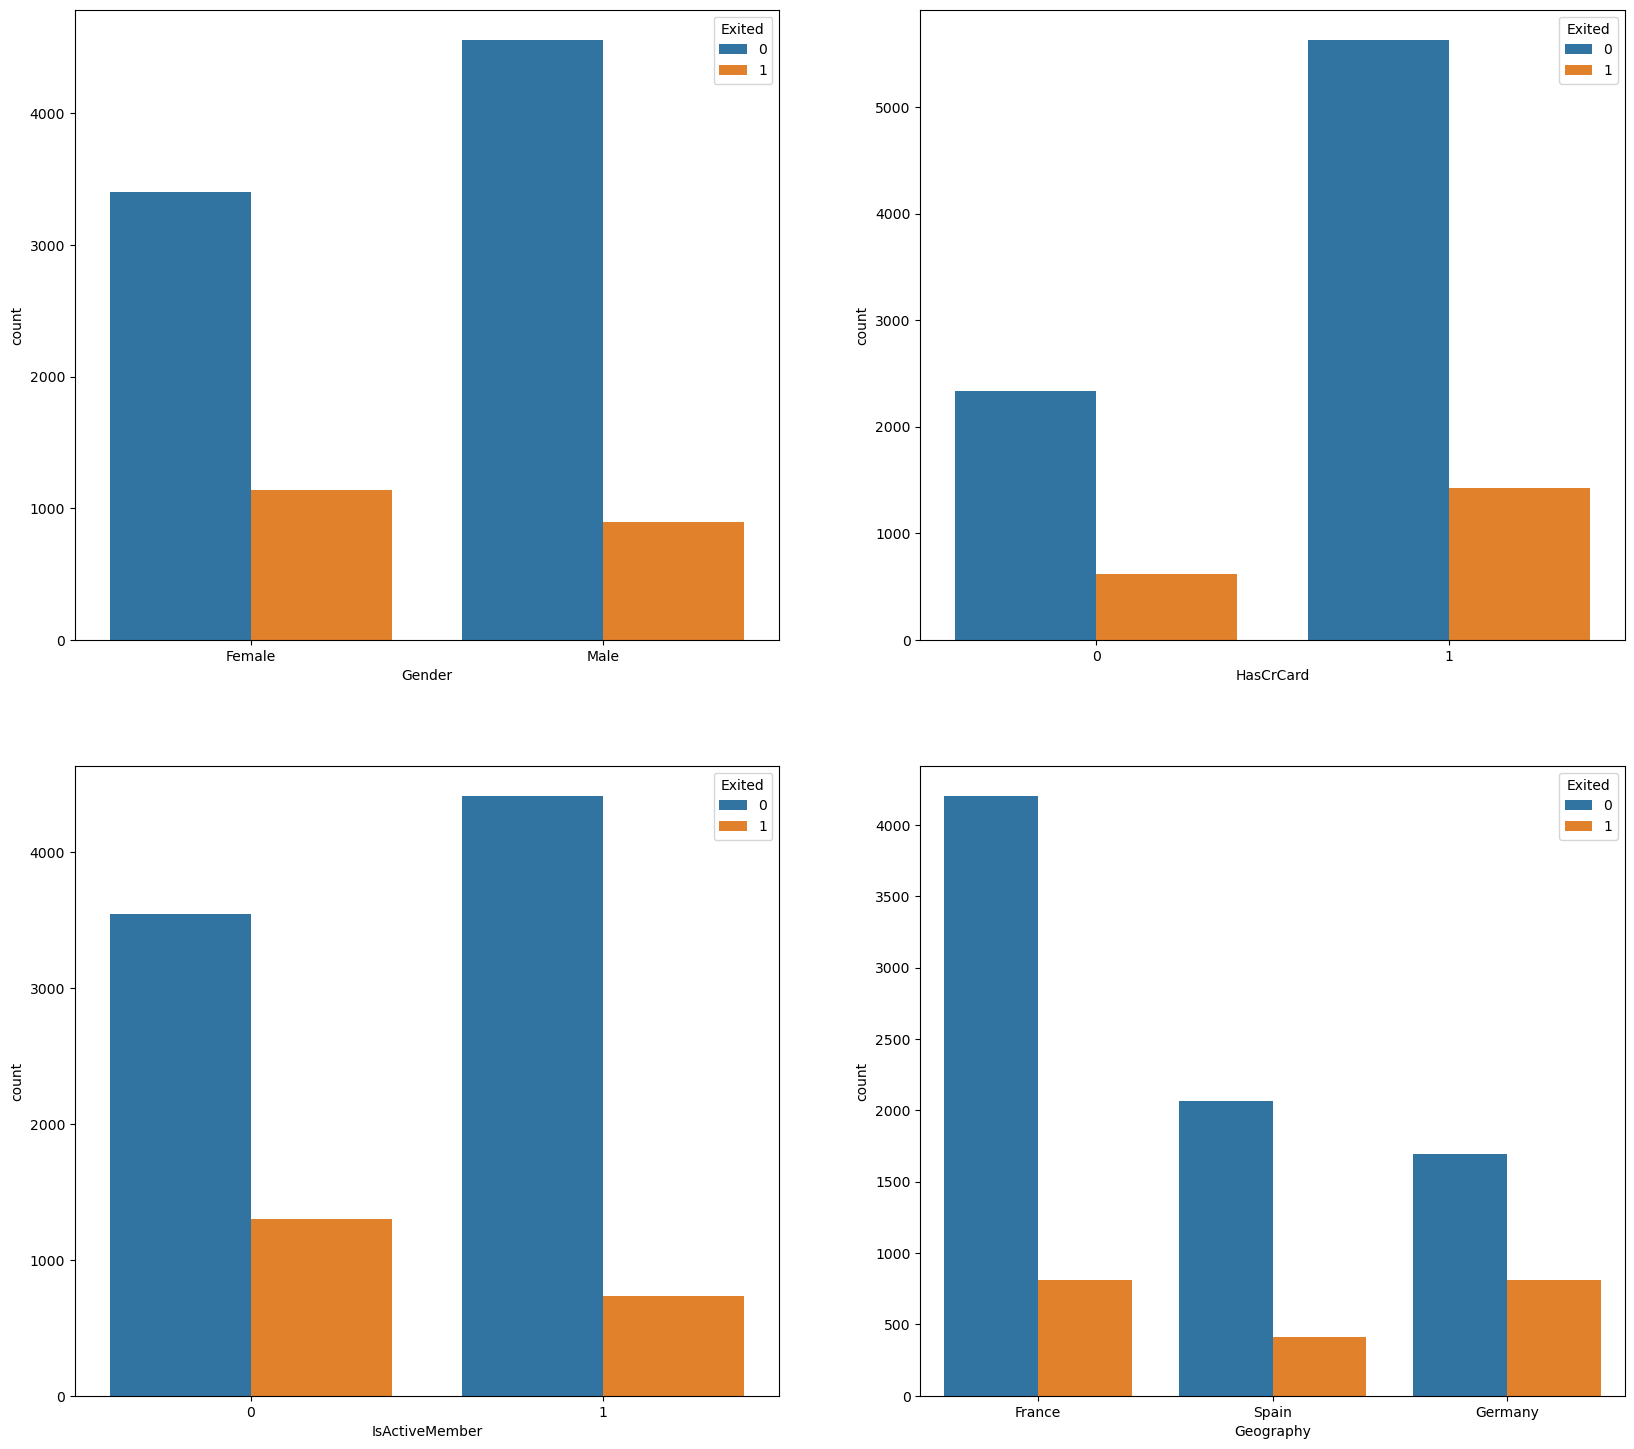

In [123]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 18))
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[1][1])

We can observe a few things with our data;

* We have a higher number of Men in our dataset and a higher ratio of Exited to Not Exited when you compare it to the Female ratio. However, having way more men that Exited compared to women who did is not applicable. Women do not make more than half of our dataset however on average, they are more likely to churn than men.


* If you have a credit card with the bank, you are way more likely to not churn. This might be due to a few perks their clients receive. It would have been nice to have a little more context on this feature.


* Lastly, if the client is an Active member, they are very likely to stay with us and very likely to not churn. However we also have a great number of customers who are not active but stay with us. This could mean that we do not have other great features that could push a customer to be more engaged with us. But also this could mean we are not disengaging with our inactive customers which is good but we should really work hand in hand with our customers. (*Geography mentioned above)

With the aid of a Histogram, let's visualize the distribution of all the continuous data. Since it is a numerical feature, it will review where most of our data is located 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

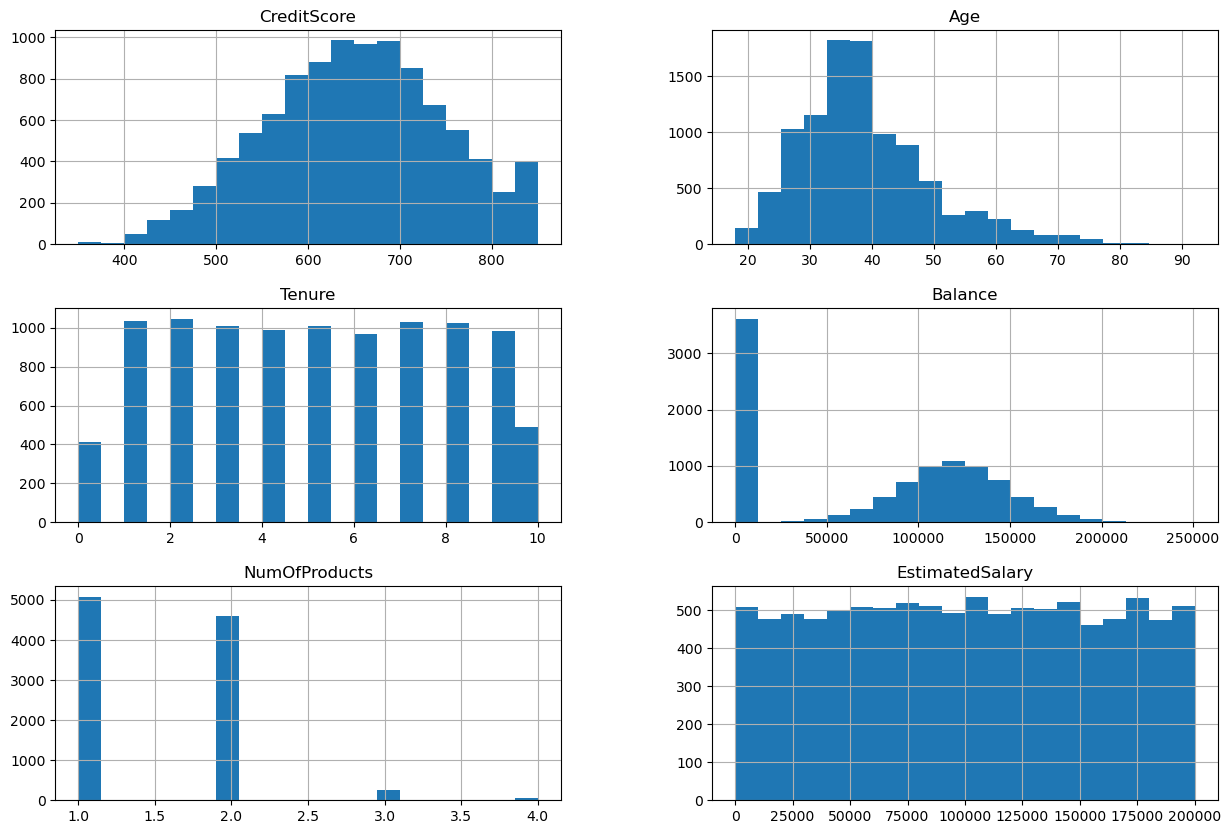

In [124]:
df.hist(con_attr, bins=20, figsize =(15,10))
plt.tight_layout

With this layout we can observe the following;

* Credit scores seemed to be skewed to the left. The majority of credit scores are found between the 600 and 700 range.


* Tenure is quite balamced. We have very few customers that have with less than 1 year banking with us. 1-2 years of tenure is pretty high. This data shows that we mostly have information of our long time clients which is a good thing but as we discussed earlier, most people who churned were between 40 and 50 so we have to find new strategies to keeo our lasting clients. Also we need to develop a campaign or new features to attract new customers for our dataset. 


* We have a very high number of clients who have a balance of 0 then later have a couple who have a balance between 100000 and 150000. It is pretty alarming that we have so much customers with a balance of 0. In this context, this could maybe be due to the fact that we do not offer incentives or enough value to customers to be pushing them to keep their money with us. This could explain the high number of inactive members and accounts. 


* Most customers have either 1 or 2 products with us. The fact that the graph goes up to 4 shows that we can offer up to 4 products however, our conversion rates are bad. There is a small amount of clients who have 3 products with us and even a smaller with 4. I'd say they should try to push their products more and offer more accessibility and value so that it will make customers want to get more in tune with our products.


* Estimated Salary is pretty well balanced all round. It is a good range all data points are well represented

Let's further analyze our continous data with the help of a boxplot and the 'Exited' variable

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

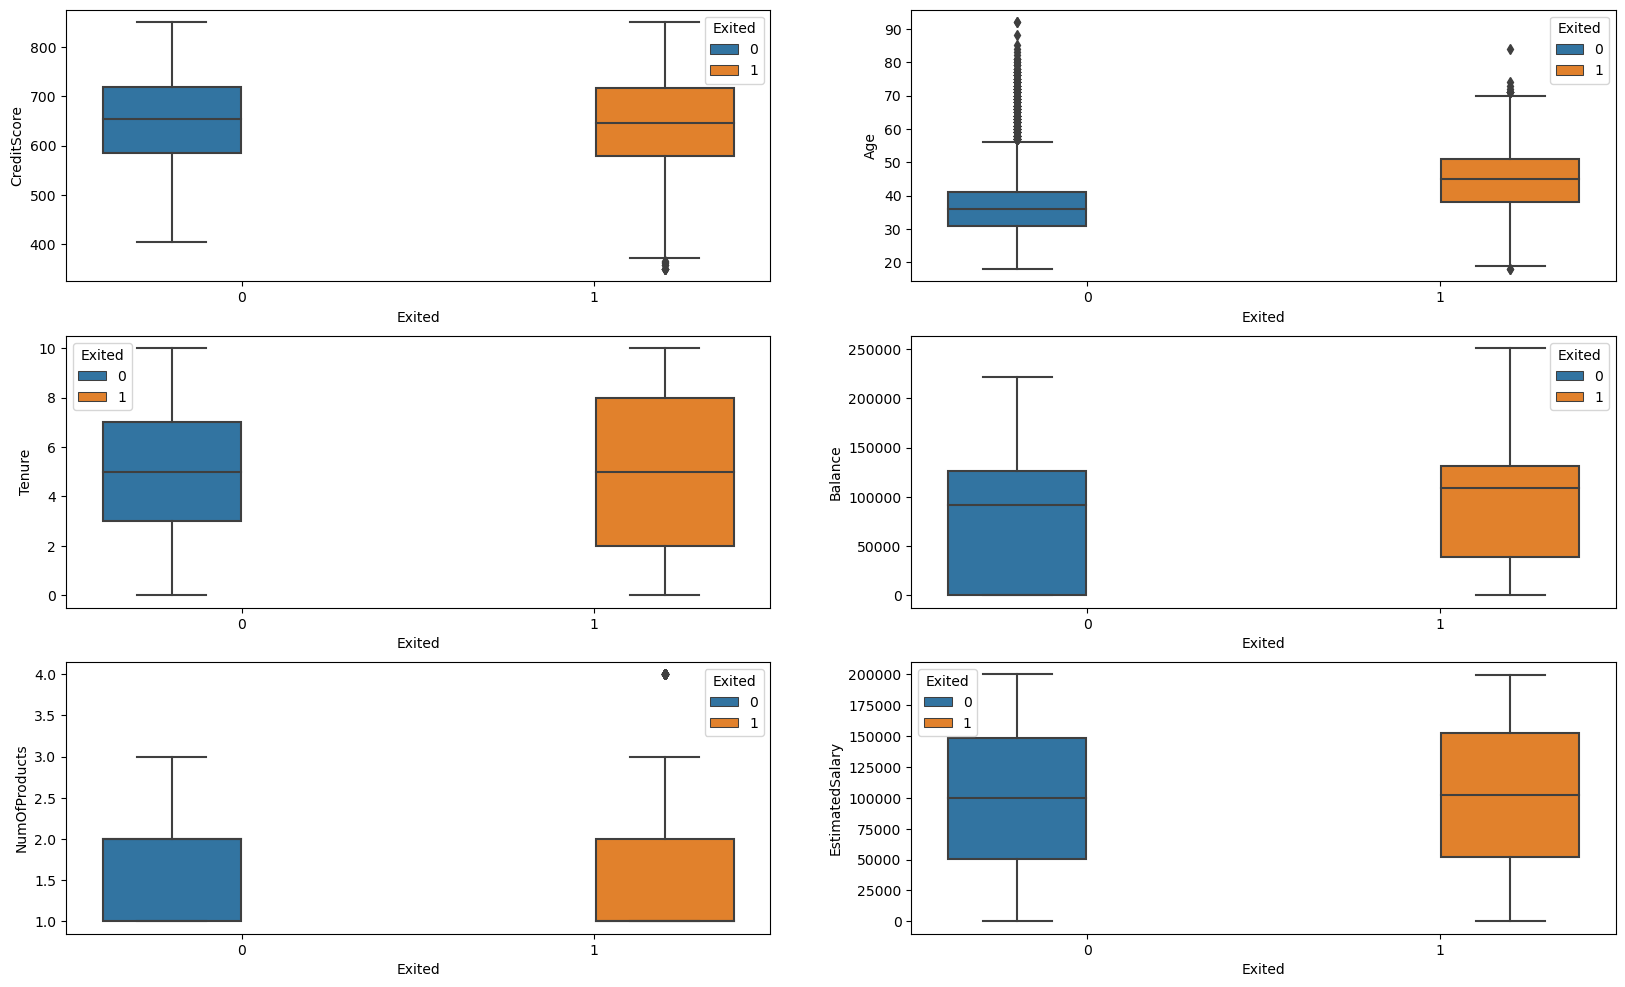

In [97]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

With the boxplots above we can observe the following;

* There is no peculiar Credit Score difference between those who churned and those who did not. Most values are found between 600 and 700. Those who Exited have a bigger credit score range however.


* As mentioned before, Class 0 has most of its values between ages 30 and 40 and Class 1 between 40 and 50. However, Class 0 has a great amount of outliers in the upper range which is pretty normal to be honest.


* The median in both Class 0 and Class 1 are the same. The big difference is the range in those who exited is way greater than those who did not. Most people who churned had 2 - 8 years of tenure with us. This relates back to the point that we have to do better to keep our existing customers. The proof in this reasoning is most customers that do not exit have a smaller range and spent 3 - 7 years with us.


* Most people that keep banking with us have between 0 and 125,000 in their balance. Compared to those who churned, the range is quite interesting. Most people who exited had a balance in their account. There is also a higher median in that category despite having way less data points than those who did not churn. What could be the reason for someone to churn when that person still has a balance? The Exited section has the biggest range and has the highest value in the dataset. A hypothesis that could explain this could be extreme customer dissatisfaction. For me this could be the most valid reason. Another reason could be legal issues or policies that could make a customer churn.


* Number of products and Estimated Salary seems to have almost the same ranges between them. It looks balanced in both graphs.




Let's see how the data correlates with each other;

In [126]:
corr = df.corr()

<AxesSubplot:>

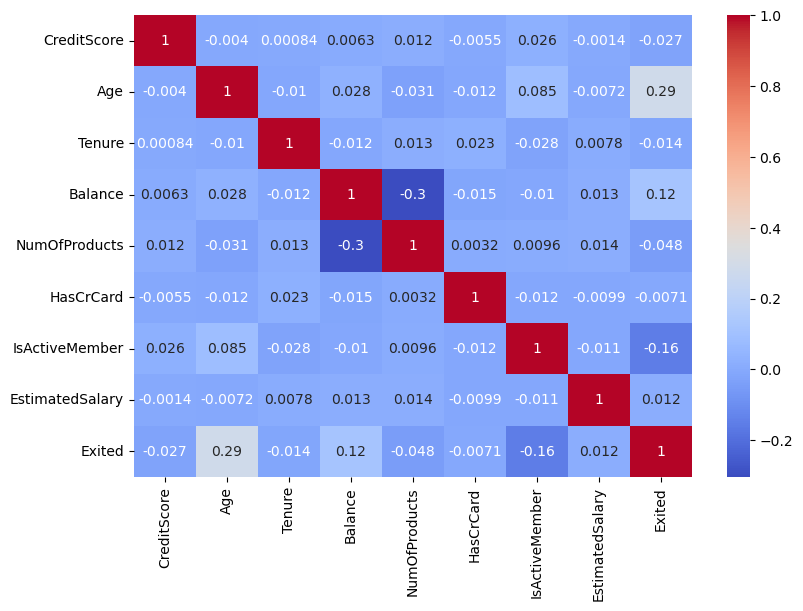

In [127]:
fig, ax = plt.subplots(figsize=(9,6))

sns.heatmap(corr,annot=True,cmap='coolwarm')


It seems that our data does not correlate well with each other. The only one with a low correlation is 'Age' and 'Exited' this is because people who Exit happen to have a high chance to do so only between a particular age range. 

This lack of correlation could really be because there is truly no correlation between the variables or because of the method that is used to calculate the correlation which only measures the linear relationships between them.





# 4. Predictive Modeling with Logistic Regression and Model training (without adjustments)

Let's execute a train test split and train our model. To carry out the training we have to split the data into a training set and testing set by using train test split.

In [186]:
#Let's import the necessary libraries and our logistic regression model
#Let's also import our classification report and confusion matrix 
# for future endeavors

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

Before anything, we have to encode and convert 'Country' and 'Gender' to integers. It has to be assigned a number for each category in these attributes.

In [187]:
#Let's convert categorical variables to numerical values
from sklearn.preprocessing import LabelEncoder

#Application of the LabelEncoder
le = LabelEncoder()

# encode Country column
df['Geography'] = le.fit_transform(df['Geography'])

# encode Gender column
df['Gender'] = le.fit_transform(df['Gender'])

In [188]:
# In the Gender column, 0 is Female and 1 is Male
# In the Geography column, 0 is France , 1 is Germany and 2 is Spain
# Let's recheck our dataframe;

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [189]:
# Let's define our X and y
# We will drop 'Exited' from our X because it is our target variable

X= df.drop(['Exited'],axis=1)
y= df['Exited']

Let's now split the data into training and testing sets. We will use 80% of our data for training and the remaining 20% for testing. The random state will be 42 which is the default. This fixed seed will allow our results to be reproducible.

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's train and fit our logistic regression model on the training set

In [237]:
logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train, y_train)

LogisticRegression(random_state=42)

# 5. Predictions and Evaluations (without adjustments)

Now let's predict the values for the testing data:

In [238]:
y_pred = logmodel.predict(X_test)

Finally, let's create a classification report to evaluate the performance of our model

In [241]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

[[1573   34]
 [ 365   28]]


In this classification report, we can see that the model has an overall accuracy of 0.80, this means that it correctly predicts 80% of the customers who will churn or not. Which is kind of biased because Class 0 has way more data than elements of Class 1 and represents more our sample.

The precision, recall, and f1-score for class 0 (customers who did not churn) are relatively high at 0.81, 0.98, and 0.89, respectively. 

However, the precision, recall, and f1-score for class 1 (customers who churned) are relatively low and bad at 0.45, 0.07, and 0.12, respectively. 

This indicates that the model is better at predicting customers who will not churn (class 0) than customers who will churn (class 1). 

However, in the optic of customer retention, our recall score is very bad and our model is failing to correctly predict customers who are going to churn. In this context, we rather have more false positives than false negatives. Because missing churners means we will miss out on revenue.

The model correctly identified 28 out of 393 actual churned customers, resulting in a low recall score of 0.076 (model is only 7% right). Also the precision score meant that only 45% of customers predicted to churn actually did. The model is not ideal. 

So for this instance, we have to optimize our model for class 1 for a higher recall. Keep in mind there is a trade-off between recall and precision. A higher recall is done by;

* Balancing our model (we have way more not-churned customers than churned customers, in the future we have to balance our dataset with more data variety). 


* Adjusting the threshold. By lowering our threshold, we will increase the sensitivity of our model hence getting more true churn cases which is going to increase recall.

# 6. Predictive Modeling with Logistic Regression and Model training (with adjustments)

Firstly let's balance our data by oversampling our category of churned customers. This mainly done because they are not predominant in our dataset. As a future note, a model is easier created with a balanced data set in the category of our target variable.

The data will be balanced with the Synthetic Minority Oversampling Technique (SMOTE) algorithm.

In [246]:
# Let's import the SMOTE algorithm
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Balance the data with SMOTE and resample it
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Now let's split our data into a training and testing set with a 80/20 split 

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Let's fit our logistic regression model with a custom threshold.
Explain why we modified our threshold

# 7. Predictions and Evaluations (with adjustments)

Now let's predict the values for the testing data:

In [248]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Before anything, I would like to explain the code below;

* 'Logreg.predict_proba(X_test)' predicts the probability of each class labael for the test set 'X_test'.


* We used '[:,1] because we are only interested in optimizing the second column of the predicted probabilites and this contains the data on the probability of the churned customers (Those with 1). This is because 'predict_proba' returned a NumPy array and sorted data this way.


* 'astype(int)' is used to convert the resulting boolean array to integers (0 or 1) because we want to predict integers.


* Now the threshold '(0.4)' in this context is important. By default the threshold is 0.5. Reducing the threshold can lead to an increase in the number of positive predictions, which means that more individuals or samples are classified as positive. 

Thresholds go from 0 to 1 a good list would be threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]. 

* In the case of our problem we want to increase recall and optimize class 1 by reducing the threshold. The threshold is important because it helps us balance the trade-off between accuracy and other factors like precision and recall. If we set the threshold too high, we might miss some churned customers (false negatives). If we set it too low, we might end up with too many false positives (customers we predict will churn but actually don't). So we have to pick a lower threshold and in this context after trying lower thresholds, 0.4 seems to fit well and we want our model to consider all probabilitesthat are greater than or equal to 0.4 as positive predictions (that is why we use >=)


In [255]:
#Let's finally set up our model
# Threshold is 0.4
y_pred = (logreg.predict_proba(X_test)[:, 1] >= 0.4).astype(int)

In [256]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.44      0.56      1633
           1       0.60      0.86      0.70      1553

    accuracy                           0.65      3186
   macro avg       0.68      0.65      0.63      3186
weighted avg       0.68      0.65      0.63      3186

[[ 725  908]
 [ 218 1335]]


This looks way better compared to our previous model especially for our Class 1 and our goals. In this classification report, we can see that the model dropped in overall accuracy and predicts 65% of the customers who will churn or not. But is definitely less biased than the previous model. The precision, recall, and f1-score for class 0 (customers who did not churn) dropped too.

However, the precision, recall, and f1-score for class 1 (customers who churned) are way better and are at 0.60, 0.86 and 0.70 respectively. A high recall of 86% means our model can correctly say that out of 1553 customers, the model predicted 1335 to churn and they actually did. This leads to it being 86% correct. 

Recall is calculated as True Positive/(True Positive + False Negative), which is 1335/(1335+218) = 0.86

However, like mentioned before it comes with a trade-off even if it is better to have more false positives than false negatives. Which happened because now the precision is now 60% for Class 1

Precision is calculated as True Positive / (True Positive + False Positive), which is 1335 / (1335 + 908) = 0.60. This means that out of all the customers predicted to churn, only 60% actually did.

# 8. Conclusion

The model is more effective in prediciting customers who are likely to churn. A high recall score really shows that the model serves more the purpose we set it up for which us predicting who actually churned based on certain features however because of the drop in precision, this could lead to us allocating resources in customers who are not even likely to churn. But rather be safe than sorry. The most important is this can help us save more in revenue

Just for future reference, if you want a model like this to be more effective, give it some time and take the initiative to collect more information especially concerning the churners. Also, it would be great to have other internal features about the bank especially their customer service which could be the key to preserving our longetivity in business.